In [9]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [11]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7e1dd588e200>)

In [12]:
train_data = pd.read_table('ratings.txt')

In [13]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [14]:
print(len(train_data)) # 리뷰 개수 출력

200000


In [15]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())

True


In [19]:
import tqdm
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm.tqdm(train_data['document']):
    sentence = str(sentence)
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)


100%|██████████| 200000/200000 [15:45<00:00, 211.50it/s]


리뷰의 최대 길이 : 95
리뷰의 평균 길이 : 12.338


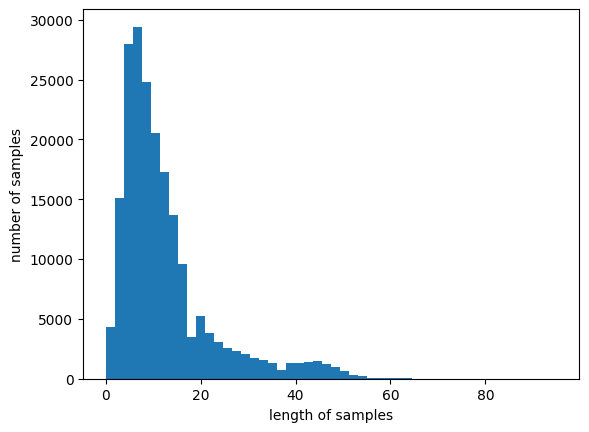

In [20]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [22]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [23]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(17616, 100)

In [24]:
print(model.wv.most_similar("최민식"))

[('최민수', 0.8440397381782532), ('공효진', 0.8422326445579529), ('한석규', 0.8318706154823303), ('설경구', 0.8264960050582886), ('박중훈', 0.8239172697067261), ('송강호', 0.8238858580589294), ('문소리', 0.8231027126312256), ('이민호', 0.822413980960846), ('김수현', 0.8221713304519653), ('양동근', 0.821273922920227)]


In [25]:
model.wv.save_word2vec_format('ko_w2v') # 모델 저장

In [26]:
!python -m gensim.scripts.word2vec2tensor --input ko_w2v --output ko_w2v